# Project: Write a Data Science Blog Post 

# Section 1: Business Understanding

## Project Goal

The main aim of this project is to explore the data of Athens Airbnb rental activity and find out important insights that are related to the reservation price trends and the key factors surrounding them. Based on these considerations, I decided to focus on the following business requirements in order to help future investors to set up their own business planning based on:

## Question 1: Which is the best period to visit Athens?


## Question 2: Which are most expensive, popular properties and room types in Athens?

## Question 3: Which are most important factors of rental landscape activity that decide the reservation price?

## Library Packages for Data Analysis Manipulation and Machine Learning

In [1]:
#Import linear algebra and data manipulation packages
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import unidecode as uni
import calendar
from datetime import datetime
from tabulate import tabulate

#Import plotting packages
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

#Import machine learning packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics

# Section 2: Data Understanding

## Access and Explore
This consists one of the fundamental key ingredients of the recipe of any data science project prior to the kick-off of data analysis.

## Custom function for producing a barplot with % of missing values of a dataframe

In [2]:
def barplot_missing(df_missing,width_barplot,height_barplot,width_bars,fontsize_annotations,fontsize_ylab,fontsize_xlab,fontsize_title,fontsize_xticks,fontsize_yticks,Text):  
    '''
    returns a barplot object with % Missing of all columns contained in df_missing
    
    input: 
           df_missing: dataframe with missing values
           width_barplot: width of barplot figure
           height_barplot: height of barplot figure
           width_bars: width of bars
           fontsize_annotations: size of annotated labels of values
           fontsize_ylab: size of ylab
           fontsize_xlab: size of xlab
           fontsize_title: size of main title of barplot
           fontsize_xticks: size of xticks
           fontsize_yticks: size of yticks
           dataset:
    output:
           my_barplot: barplot object with % Missing of all columns contained in df_missing
    '''
    
    ###preprossesing of df_missing part
    
    #find percentage of missing values for each column of df_missing and round them to 1 digit
    df_missing= round(df_missing.isnull().mean()*100,1)
    
    #sort df_missing in descending order over the values
    df_missing.sort_values(ascending=False,inplace=True)
    
    #Set up a control flow in case of columns with missing or without missing 
    if(sum(df_missing[df_missing > 0])>=1):
        
        #in case of columns with missing, filter only for columns with missing values, all the rest are excluded
        df_missing=df_missing[df_missing > 0]
    
    else:
        #in case of complete columns without missing leave the missing_df to its initial form
        df_missing=df_missing
    
    ###barplot part 

    #set barplot figure size with given (width_barplot, height_barplot)
    plt.rcParams["figure.figsize"] = (width_barplot,height_barplot)
    
    #set barplot object to my_barplot 
    my_barplot=df_missing.plot.bar(width_bars)
    
    #set value annotations to print it on the barplot
    plt.bar_label(my_barplot.containers[0],fontsize=fontsize_annotations)
    
    #set ylabel
    plt.ylabel("% Missing",fontsize=fontsize_ylab)
    
    #set xlabel
    plt.xlabel("Variables",fontsize=fontsize_ylab)
    
    #set the main title
    plt.title("Percentage of missing values per variable in "+Text,loc='left',fontsize=fontsize_title)
    
    #set xticks rotated by 45 degrees to the right
    plt.xticks(rotation=45, ha="right",fontsize=fontsize_xticks)
    
    #set yticks
    plt.yticks(fontsize=fontsize_yticks)
    
    return my_barplot  

## Import Listings Dataset

In [3]:
#import the listings dataset
listings_df = pd.read_csv('C:/Users/polym/listings.csv')

#find number of listings and number of hosts
listings_number = listings_df['id'].count()
hosts_number = len(listings_df['host_id'].unique())


print('listings dataset contains information about %d listings provided by %d hosts.' %(listings_number, hosts_number))

#print first 2 rows of listings dataset                                                                                          #hosts_number))
listings_df.head(2)

listings dataset contains information about 9673 listings provided by 4809 hosts.


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211223003724,2021-12-23,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,4.84,4.50,4.66,00000957568,t,6,6,0,0,0.25
1,10990,https://www.airbnb.com/rooms/10990,20211223003724,2021-12-23,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,4.91,4.81,4.79,00001070920,t,6,6,0,0,0.48


 Listings dataset contains 74 columns.

## Missing Values in Listings Dataset

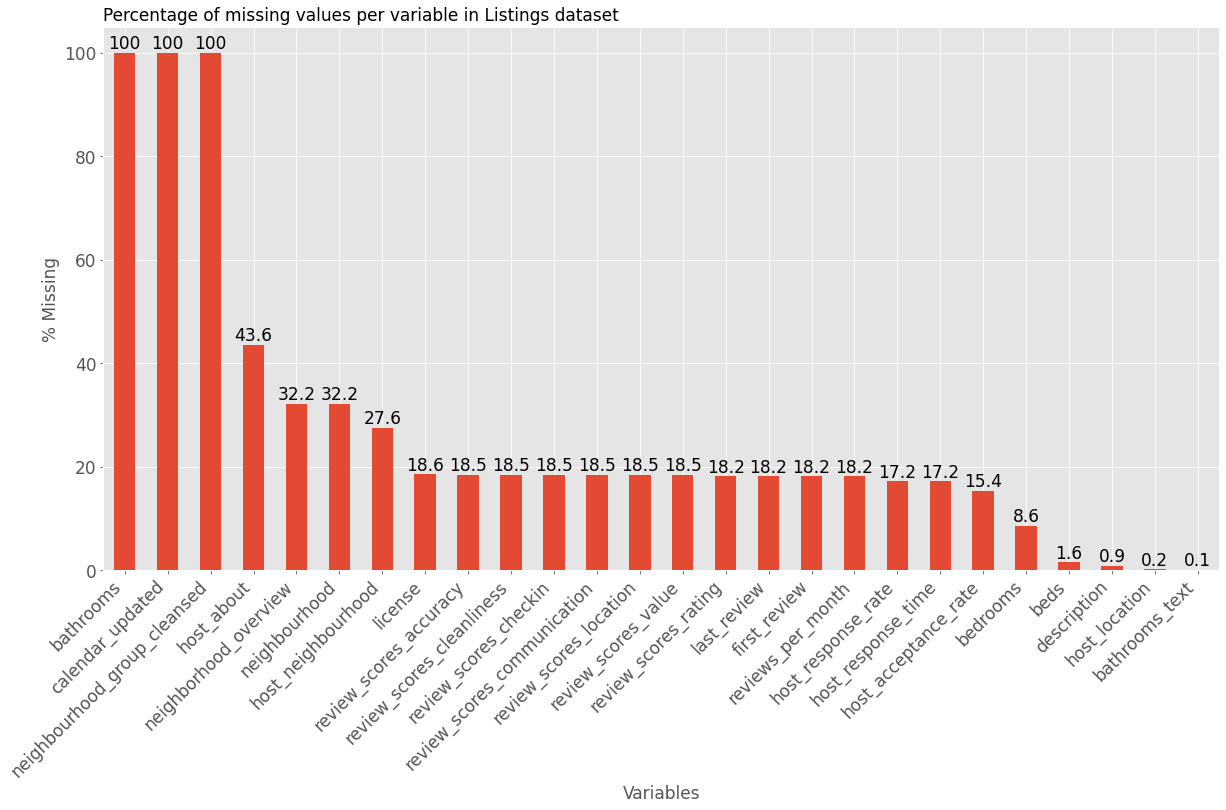

In [4]:
#barplot for % missing values of listings dataset applying the custom function barplot_missing(.)
barplot_missing_listings_df=barplot_missing(df_missing=listings_df,width_barplot=20,height_barplot=10,width_bars=0.4,fontsize_annotations=17,fontsize_ylab=17,fontsize_xlab=17,fontsize_title=17,fontsize_xticks=17,fontsize_yticks=17,Text="Listings dataset")

From the above barplot, we clearly state for the listings dataset that bathrooms, calendar_updated and neighbourhood_group_cleansed miss completely, whereas host_about, neighbourhood_overview, neighbourhood and host_neighbourhood miss moderately while the rest are missing with with a bound lower than 19%.

## Import Calendar Dataset

In [5]:
#import the calendar dataset
calendar_df = pd.read_csv('C:/Users/polym/calendar.csv')

#find number of rows and columns in dataset
rows = calendar_df.shape[0]
cols=calendar_df.shape[1]

print('calendar dataset includes %d rows and %d columns.' % (rows,cols))

#print first 2 rows of calendar dataset                                                                                          #hosts_number))
calendar_df.head(2)

calendar dataset includes 3530645 rows and 7 columns.


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1927601,2021-12-23,f,$65.00,$65.00,1,14
1,1927601,2021-12-24,t,$65.00,$65.00,1,14


## Missing Values in Calendar Dataset

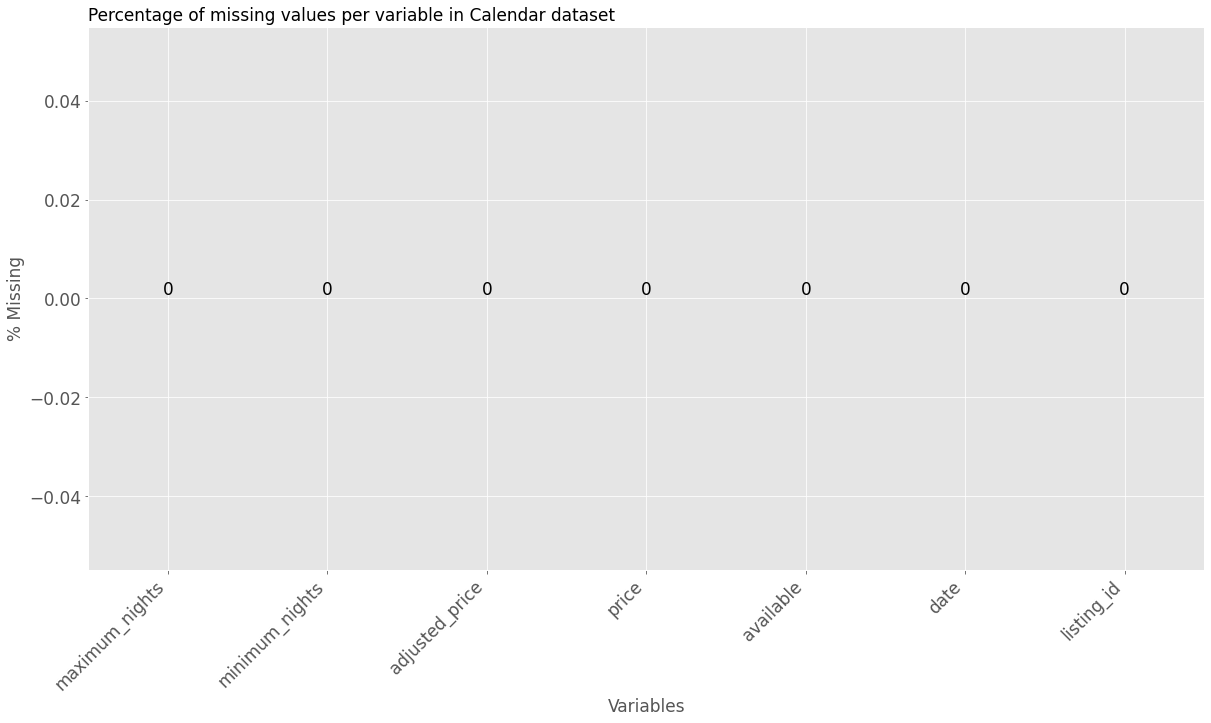

In [6]:
barplot_missing_calendar_df=barplot_missing(df_missing=calendar_df,width_barplot=20,height_barplot=10,width_bars=0.4,fontsize_annotations=17,fontsize_ylab=17,fontsize_xlab=17,fontsize_title=17,fontsize_xticks=17,fontsize_yticks=17,Text="Calendar dataset")

From the above barplot, we clearly observe for the calendar dataset that all the variables are complete without missing.

# Section 3:

**** Notice I created two different Data Preparation sections. The first one is dedicated to the data analysis itself and the other one to the modeling phase.

# Data Preparation 1 

## i) Left Join Calendar and Listings datasets on Listing_id

In [7]:
#rename id column as listing_id in order to match the join afterwards 
listings_df = listings_df.rename(index=str, columns={"id": "listing_id"})

#left join two datasets on listing_id to obtain a combined dataframe
df = pd.merge(calendar_df, listings_df, on = 'listing_id',how="left")
df.head(2)

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1927601,2021-12-23,f,$65.00,$65.00,1,14,https://www.airbnb.com/rooms/1927601,20211223003724,2021-12-23,...,4.85,4.89,4.58,E.O.T - 0206k134hO293501,f,2,1,0,1,0.3
1,1927601,2021-12-24,t,$65.00,$65.00,1,14,https://www.airbnb.com/rooms/1927601,20211223003724,2021-12-23,...,4.85,4.89,4.58,E.O.T - 0206k134hO293501,f,2,1,0,1,0.3


This step is essential as it allows to combine the information about the listings dataset into the calendar dataset, so that each calendar row can represent a daily transaction for a given listing_id enriched with the rest of the features originating from the listings dataset such as price, availability and so on. Notice how the number of columns increased from 73 to 80 rows.

## Custom functions for data transformation

## Custom function to extract month from a date string (applied row-wise)

In [8]:
def extract_month_from_date(row):  
    '''
    returns a new column with extracted month in integer form from the current date string
    
    input: 
           row: the row of the date column
           
    output:
           extracts the new processed column that represents the month in integer
    '''    
    return int(row['date'].split('-')[1])

## Custom function to extract year from a date string (applied row-wise)

In [9]:
def extract_year_from_date(row):  
    '''
    returns a new column with extracted year in integer form from the current date string
    
    input: 
           row: the row of the date column
           
    output:
           extracts the new processed column that represents the year in integer
    '''    
    return int(row['date'].split('-')[0])

## ii) Columns Data Transformations 

a first look in some columns suggest that preproccesing raw data is an essential step as you see below

In [10]:
df['date']

0          2021-12-23
1          2021-12-24
2          2021-12-25
3          2021-12-26
4          2021-12-27
              ...    
3530640    2022-12-18
3530641    2022-12-19
3530642    2022-12-20
3530643    2022-12-21
3530644    2022-12-22
Name: date, Length: 3530645, dtype: object

notice that the date column is in string format and must be initially splitted and to end this we convert the columns in integer form whether we extract year, month or day.

In [11]:
#extract month from date represented as a string using extract_month_from_date(.) function
df['month'] = df.apply(lambda row: extract_month_from_date(row),axis=1)
print(df['month'])

0          12
1          12
2          12
3          12
4          12
           ..
3530640    12
3530641    12
3530642    12
3530643    12
3530644    12
Name: month, Length: 3530645, dtype: int64


likewise holds the same for the year below 

In [12]:
#extract year from date represented as a string using extract_year_from_date(.) function
df['year'] = df.apply(lambda row: extract_year_from_date(row),axis=1)
print(df['year'])

0          2021
1          2021
2          2021
3          2021
4          2021
           ... 
3530640    2022
3530641    2022
3530642    2022
3530643    2022
3530644    2022
Name: year, Length: 3530645, dtype: int64


a first look in price columns suggests also tha preproccesing is also essential in this case

In [13]:
df['price_x']

0          $65.00
1          $65.00
2          $65.00
3          $65.00
4          $65.00
            ...  
3530640    $50.00
3530641    $50.00
3530642    $50.00
3530643    $50.00
3530644    $50.00
Name: price_x, Length: 3530645, dtype: object

In [14]:
df['adjusted_price']

0          $65.00
1          $65.00
2          $65.00
3          $65.00
4          $65.00
            ...  
3530640    $50.00
3530641    $50.00
3530642    $50.00
3530643    $50.00
3530644    $50.00
Name: adjusted_price, Length: 3530645, dtype: object

From the above price columns cannot be handle to infer from the data as they are in string format and the $ sign must me removed and then convert to float

In [15]:
#convert price to number eliminating the $ sign
df['price'] = df['price_x'].astype(str)
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")
print(df['price'])

#convert adjusted price to number eliminating the $ sign
df['adjusted_price'] = df['adjusted_price'].astype(str)
df['adjusted_price'] = df['adjusted_price'].str.replace("[$, ]", "").astype("float")
print(df['adjusted_price']) 

0          65.0
1          65.0
2          65.0
3          65.0
4          65.0
           ... 
3530640    50.0
3530641    50.0
3530642    50.0
3530643    50.0
3530644    50.0
Name: price, Length: 3530645, dtype: float64
0          65.0
1          65.0
2          65.0
3          65.0
4          65.0
           ... 
3530640    50.0
3530641    50.0
3530642    50.0
3530643    50.0
3530644    50.0
Name: adjusted_price, Length: 3530645, dtype: float64


from the above we can see that the new processed prices columns are now in a right format to be used for data analysis

In [16]:
#extract month name from month represented as an integer
df["month_name"]=df['month'].apply(lambda row: calendar.month_abbr[row])

#extract day name from month represented as date 
df["day_name"]=df['date'].apply(lambda row: pd.Timestamp(row).day_name())

## iii) Remove Missing Rows and Impute Missing Information

In [17]:
#remove rows from dataframe where price_x == nan, because price will be used as response column
df = df.dropna(subset=['price_x'])

#impute missing values with mean value for host_listings_count
df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    
#impute in missing values for bedrooms and beds with mode
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    
    
#fill missing values for review scores columns
review_scores_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']

#iterate over all review_score_columns to impute with the mean of each respective column
for column in review_scores_columns:    
    df[column].fillna(df[column].mean(), inplace = True)

## iv) Drop Redundant or Full Missing Columns

In [18]:
#the list of irrelevant columns
columns_to_drop = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'description',
                    'neighbourhood', 'neighbourhood_cleansed',"neighbourhood_group_cleansed","bathrooms",
                   'neighborhood_overview', 'picture_url',
                    'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                    'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'license', 'price_y',
                  'reviews_per_month','date','price_x','host_response_rate','amenities','minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm','number_of_reviews_ltm', 'number_of_reviews_l30d']

#drop only the irrelevant columns
df=df.drop(columns=columns_to_drop)

## v) Filter only listings of 2022

In [19]:
#we will focus only on listings of 2022
df=df[df["year"]==2022]
df.shape

(3443588, 39)

****notice that df dataframe is used as a final dataframe to answer respectively Question 1 and Question 2 respectively 

# Data Preparation 2

## i) Drop Redundant Columns

In [20]:
#the list of irrelevant columns
columns_to_drop = ['listing_id','host_since','host_verifications','year','bathrooms_text','day_name','month_name','month','maximum_nights_x','minimum_nights_x','maximum_nights_y','minimum_nights_y']

#drop only the irrelevant columns
df2=df.drop(columns=columns_to_drop)

****notice that df2 dataframe is used as a final dataframe to answer Question 3

## ii) Transform Categorical Variables into dummies and drop the original one

In [21]:
#turn categorical columns into dummies (baseline function of udacity course)
cat_columns = list(df2.select_dtypes(include=['object']).columns)
    
for col in  cat_columns:
    df2 = pd.concat([df2.drop(col, axis=1), pd.get_dummies(df2[col], prefix=col, prefix_sep='_',

                                                         drop_first=True)], axis=1)

## iii) Sample 200000 Rows from 3 Million of Listings and Filter only for Price<=2000

In [22]:
#Set random state to 2022 to allow reproducibility of results
RAND_STATE=2022

#Sample randomly 200000 rows from almost 3 millions of listings
df2=df2.sample(n=200000,random_state=RAND_STATE)

#Filter only for prices below 2000 in order to allow regression to handle only moderate values (extreme values may decrease the predictive performance)
df2=df2[df2["price"]<=2000]

# Section 4: Data Modeling

## Custom function for random forest model (Udacity Course)

In [23]:
def randomforest_model(df,Test_Size,response):
    '''
    input: 
           df: dataframe containing all columns
           Test_Size: Proportion of test set
           response: name of target column
           
    output:
           scatterplot of fitted vs. true values of response with the main predictive measures of model validation
           feature Importance Plot

    '''    
    
    #prepare train and test datasets for modelling phase

    #30% percent portion of test set
    TEST_SIZE = 0.3

    #set design matrix
    X = df2.drop(columns = response)

    #set target variable
    y = df2[[response]]

    #Split train/test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)

    #train random forest regression model
    forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
    forest.fit(X_train, y_train.squeeze())

    #calculate predictions for the model in the train and test set respectively
    y_train_preds = forest.predict(X_train)
    y_test_preds = forest.predict(X_test)
    
    ###Reproduce the scatterplot of prediction on the test set versus the real ones of the response column
    df_pred=pd.DataFrame(list(zip(y_test["price"],y_test_preds)),columns=['True_ReservationPrice','Predicted_ReservationPrice'])
    sns.lmplot(data=df_pred, x='True_ReservationPrice', y='Predicted_ReservationPrice',line_kws={'color': 'fuchsia'},height=5, aspect=2)
    plt.ylabel("True Reservation Price ($)",fontsize=24)
    plt.xlabel("Predicted Reservation Price ($)",fontsize=24)
    plt.title("Predicted vs. True Reservation Prices",loc='left',fontsize=24)
    plt.xticks( ha="right",fontsize=24)
    plt.yticks(fontsize=24)
    plt.title('R2_train: ' + str(round(r2_score(y_train, y_train_preds),2))+' vs. ' + 'R2_test: ' + str(round(r2_score(y_test, y_test_preds),2))+', '+'MSE_train: ' + str(round(mean_squared_error(y_train, y_train_preds),2))+' vs. ' + 'MSE_test: ' + str(round(mean_squared_error(y_test, y_test_preds),2)),loc="left",fontsize=20)
    
    ###Feature Importance Plot
    fet_ind = np.argsort(forest.feature_importances_)[::-1]
    fet_imp = forest.feature_importances_[fet_ind]
    labels = np.array(X.columns)[fet_ind]
    my=pd.Series(fet_imp, index=labels)
    my=round(my[my>=0.0002]*100,2)
    my=pd.DataFrame({'Variable':my.index, 'Score':my.values})
    plt.figure(figsize=(20, 10))
    splot=sns.barplot(x="Variable",y="Score",data=my)
    plt.bar_label(splot.containers[0],fontsize=24)
    plt.xlabel("Features of rental landscape", fontsize=24)
    plt.ylabel("% Score of Significance", fontsize=24)
    plt.xticks(rotation=45, ha="right",fontsize=24)
    plt.yticks(fontsize=24)

## Section 5: Fit Model+Validate Model

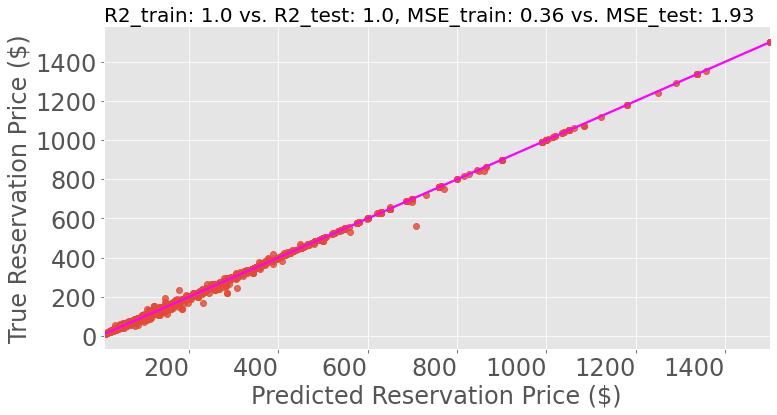

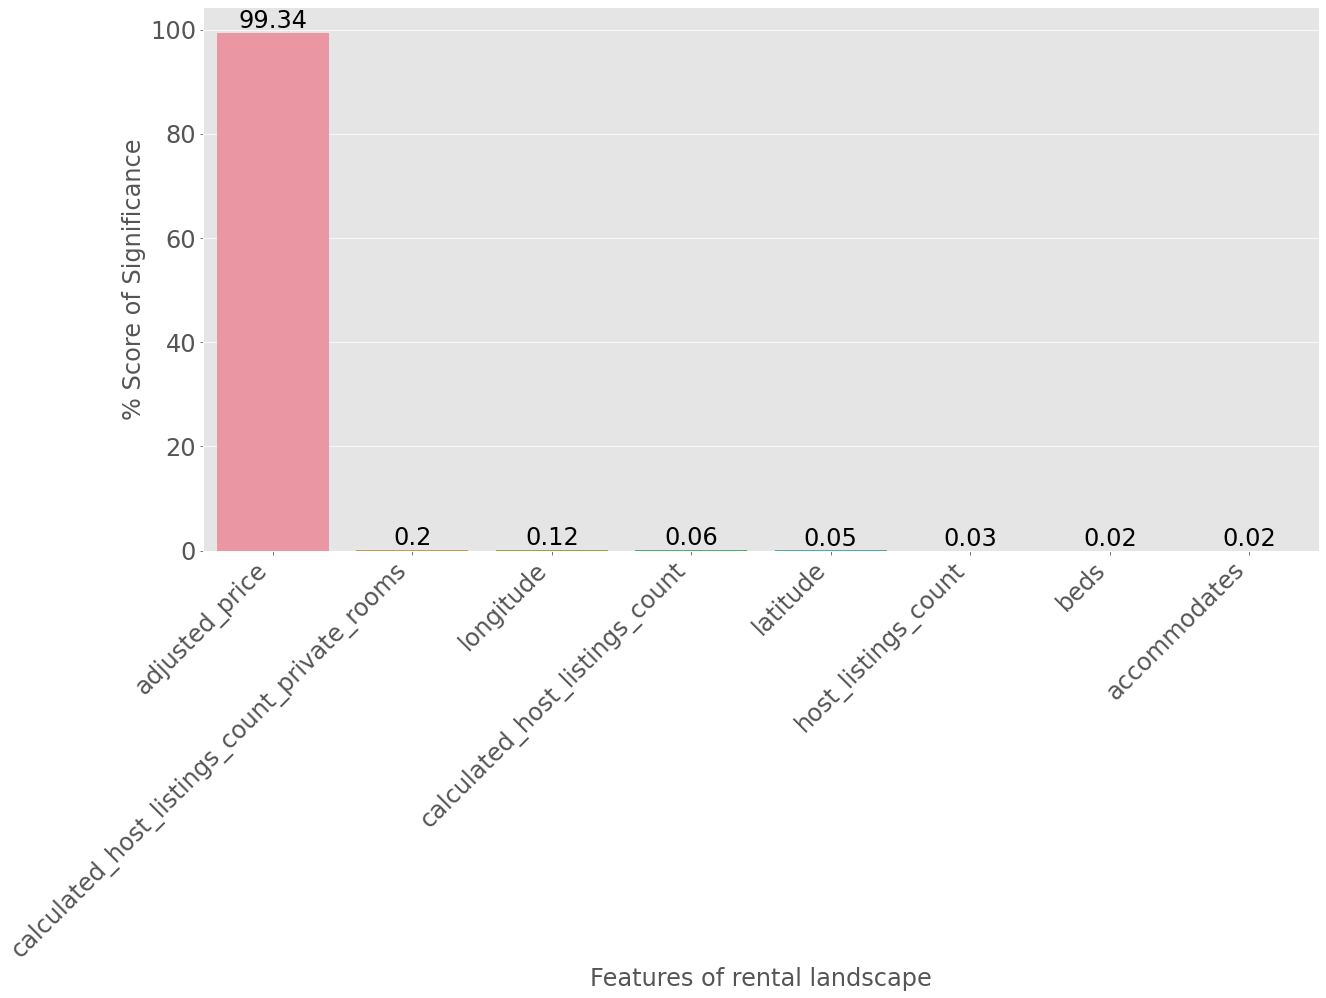

In [24]:
model=randomforest_model(df=df2,Test_Size=0.3,response='price')

**** note you can find the comments about these results on Question 3 section

# Section 6: Evaluate the Results

# Question 1: Which is the best period to visit Athens?

To address better this question we can divide it to two parallel questions that are related to the seasonality of reservation price.

# Question 1.a: Monthly Price Seasonality (Figure)

(array([ 80.,  90., 100., 110., 120., 130., 140., 150.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

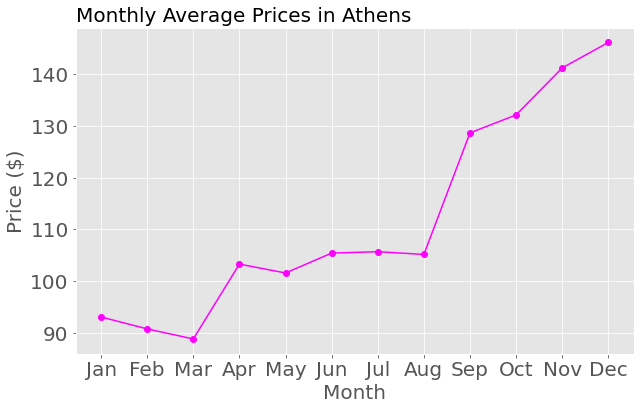

In [25]:
#set figure size
plt.rcParams["figure.figsize"] = (10,6)

#set x tick-marks
x_ticks_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#group by month and month name and aggregate over average price
my=df.groupby(['month',"month_name"],sort = True).mean()['price']

#drop index month_name
my=my.reset_index(level=["month_name"],drop=True)

#object oriented programming for the plot
fig, ax = plt.subplots(1,1) 
ax.plot(list(my.index),my.values,marker = 'o',color="fuchsia")

#set number of ticks for x-axis
ax.set_xticks(list(my.index))

#set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=20)

#set ylabel
ax.set_ylabel("Price ($)", fontsize=20)

#set xlabel
ax.set_xlabel("Month", fontsize=20)

#set title
plt.title("Monthly Average Prices in Athens",loc='left', fontsize=20)

#set yticks
plt.yticks(fontsize=20)

From the above information, we observe in general a relative increasing tendency of reservation prices as the year goes on. In particular, there is a small decrease in the begining of the year and a sudden drop at March which is due to cold period. While the prices are stabilizing from April to August, high peaks of prices occur after summer. This suggests that the best period to visit Athens according to data and to moderate temperatures of the city.

# Q1.a: Monthly Price Seasonality (Summary Table)

In [26]:
#group by month and aggregate over average price with mean, std, count reseting the index of month
my=df[['month','price']].groupby('month').agg(['mean','std','count']).round(2).reset_index()

#convert month column and into month name
my["month"]=my['month'].apply(lambda x: calendar.month_abbr[x])

#rename columns at level1
my.rename(columns={'mean': 'Average','std':'Standard Deviation','count':'#Listings'},level=1,inplace=True) 

#rename columns at level0
my.rename(columns={'month': 'Month','price':'Price'},level=0,inplace=True) 

#set index as Month
my.set_index('Month',inplace=True)

print(tabulate(my, headers=["Month","Average Price","Standard Deviation", "#Listings"], tablefmt='fancy_grid',showindex='always'))

╒═════════╤═════════════════╤══════════════════════╤═════════════╕
│ Month   │   Average Price │   Standard Deviation │   #Listings │
╞═════════╪═════════════════╪══════════════════════╪═════════════╡
│ Jan     │           93.05 │               409.93 │      299863 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Feb     │           90.74 │               391.53 │      270844 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Mar     │           88.79 │               343.93 │      299863 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Apr     │          103.27 │               445.07 │      290190 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ May     │          101.55 │               409.41 │      299863 │
├─────────┼─────────────────┼──────────────────────┼─────────────┤
│ Jun     │          105.4  │               429.2  │      290190 │
├─────────┼─────────────────┼──────────────────────┼──────────

The highest peak 146$ of reservation price occurs at December which has the largest standard deviation as the number of listings are missing from the distribution.

# Q1.b: Daily Price Seasonality (Figure)

(array([110.25, 110.5 , 110.75, 111.  , 111.25, 111.5 , 111.75, 112.  ,
        112.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

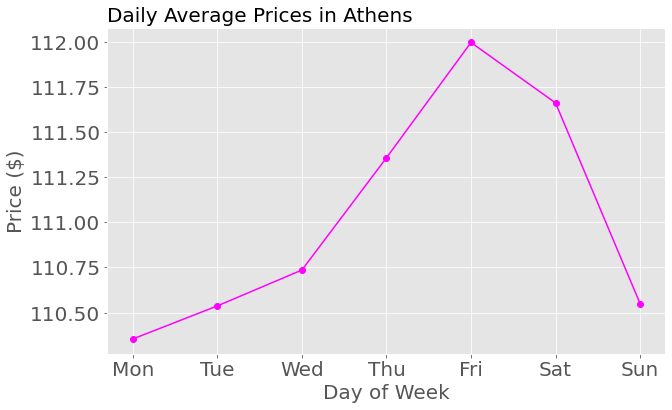

In [27]:
#set figure size
plt.rcParams["figure.figsize"] = (10,6)

#set x tick-marks
x_ticks_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

#group by day_name name and aggregate over average price
my=df.groupby(['day_name'],sort = True).mean()['price']

#reset index day_name
my=my.reset_index()

#substitute day_name with a new list
my["day_name"]=[5,1,6,7,4,2,3]

#set index as day_name
my.set_index('day_name',inplace=True)

#sort dataframe based on the index
my.sort_index(inplace=True)

#object oriented programming for the plot
fig, ax = plt.subplots(1,1) 
ax.plot(list(my.index),my.values,marker = 'o',color="fuchsia")

#set number of ticks for x-axis
ax.set_xticks(list(my.index))

#set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='horizontal', fontsize=20)

#set ylabel
ax.set_ylabel("Price ($)",fontsize=20)

#set xlabel
ax.set_xlabel("Day of Week",fontsize=20)

#set title
plt.title("Daily Average Prices in Athens",loc='left',fontsize=20)

#set yticks
plt.yticks(fontsize=20)

From the above at it was expected the average price reservations tend to increase around weekend and in particular after Thursday. The highest peak of reservation prices occurs in Friday which is definitely in line with the high demand as people are taking a break from work and available to book in advance. After Friday, the reservation prices seem to decrease with a significant drop on Sunday. This suggests that they more appropriate period to travel is on Friday.

# Q1.b: Daily Price Seasonality (Summary Table)

In [28]:
#group by day_name and aggregate over average price with mean, std, count reseting the index of day_name
my=df[["day_name","price"]].groupby(['day_name'],sort = True).agg(['mean','std','count']).round(2)
my=my.reset_index()

#substitute day_name with a new list
my["day_name"]=[5,1,6,7,4,2,3]

#set index as day_name
my.set_index('day_name',inplace=True)

#sort by the index
my.sort_index(inplace=True)
my=my.reset_index()

#substitute day_name with a new list
my["day_name"]=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

#set index as day_name
my.set_index('day_name',inplace=True)

print(tabulate(my, headers=["Day of Week","Average Price","Standard Deviation", "#Listings"], tablefmt='fancy_grid',showindex='always'))

╒═══════════════╤═════════════════╤══════════════════════╤═════════════╕
│ Day of Week   │   Average Price │   Standard Deviation │   #Listings │
╞═══════════════╪═════════════════╪══════════════════════╪═════════════╡
│ Mon           │          110.35 │               509.83 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Tue           │          110.54 │               511.61 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Wed           │          110.74 │               512.36 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Thu           │          111.36 │               515.82 │      493323 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Fri           │          112    │               512    │      483650 │
├───────────────┼─────────────────┼──────────────────────┼─────────────┤
│ Sat           │          111.66 │               5

# Q2: Which are the most expensive, popular property and room types in Athens?

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

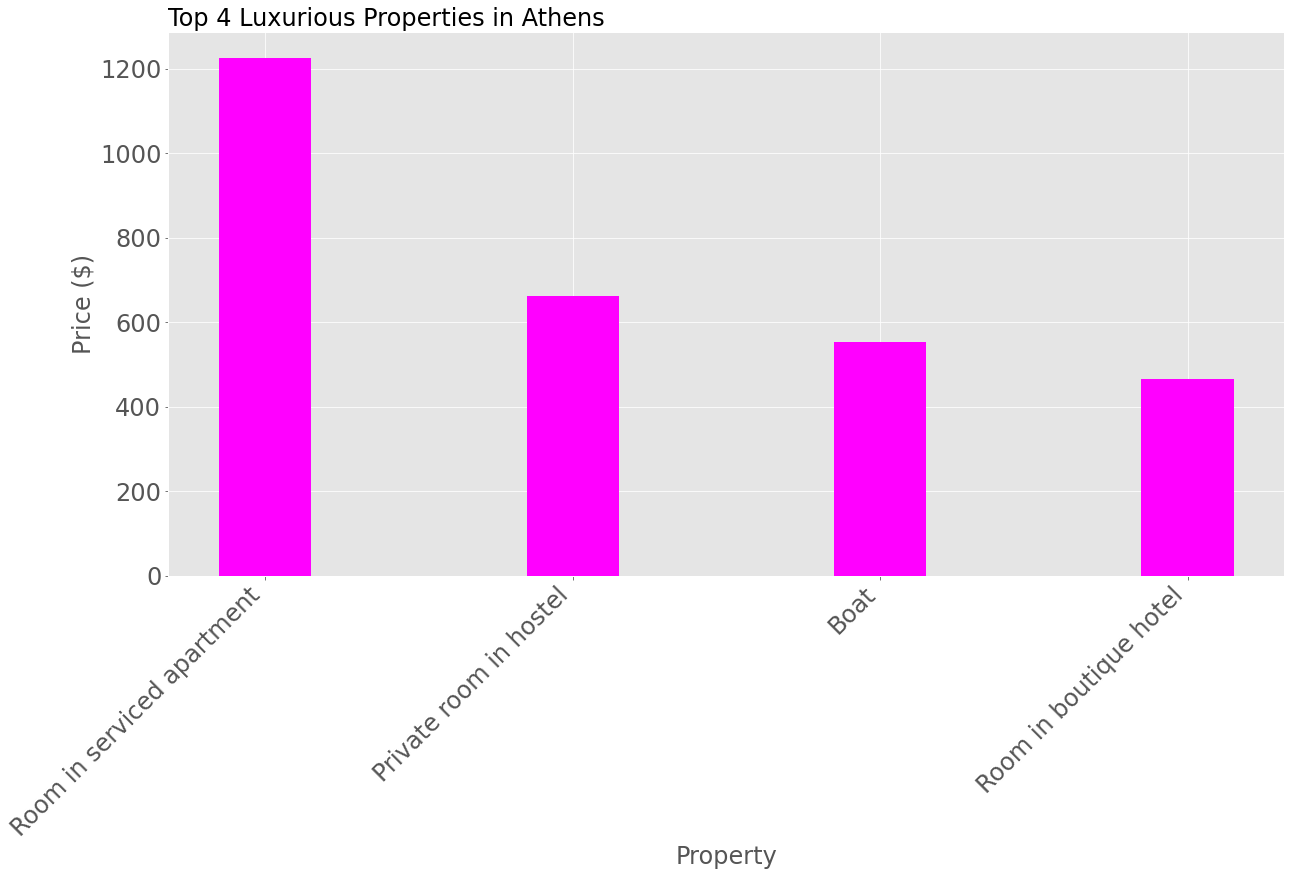

In [29]:
#set figure size
plt.rcParams["figure.figsize"] = (20,10)

#group by property_type and aggregate over average price by sorting descending
my=df.groupby(['property_type']).mean().sort_values('price', ascending=False)["price"]

#barplot of top 4 luxurious properties type
plt.bar(list(my.index)[0:4],my.values[0:4],width=0.3,color="fuchsia")
plt.ylabel("Price ($)",fontsize=24)
plt.xlabel("Property",fontsize=24)
plt.title("Top 4 Luxurious Properties in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

We observe that room in serviced apartment to be the most luxurious property (1200$) followed by private room in hostel, boat and room in boutique hotel.

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

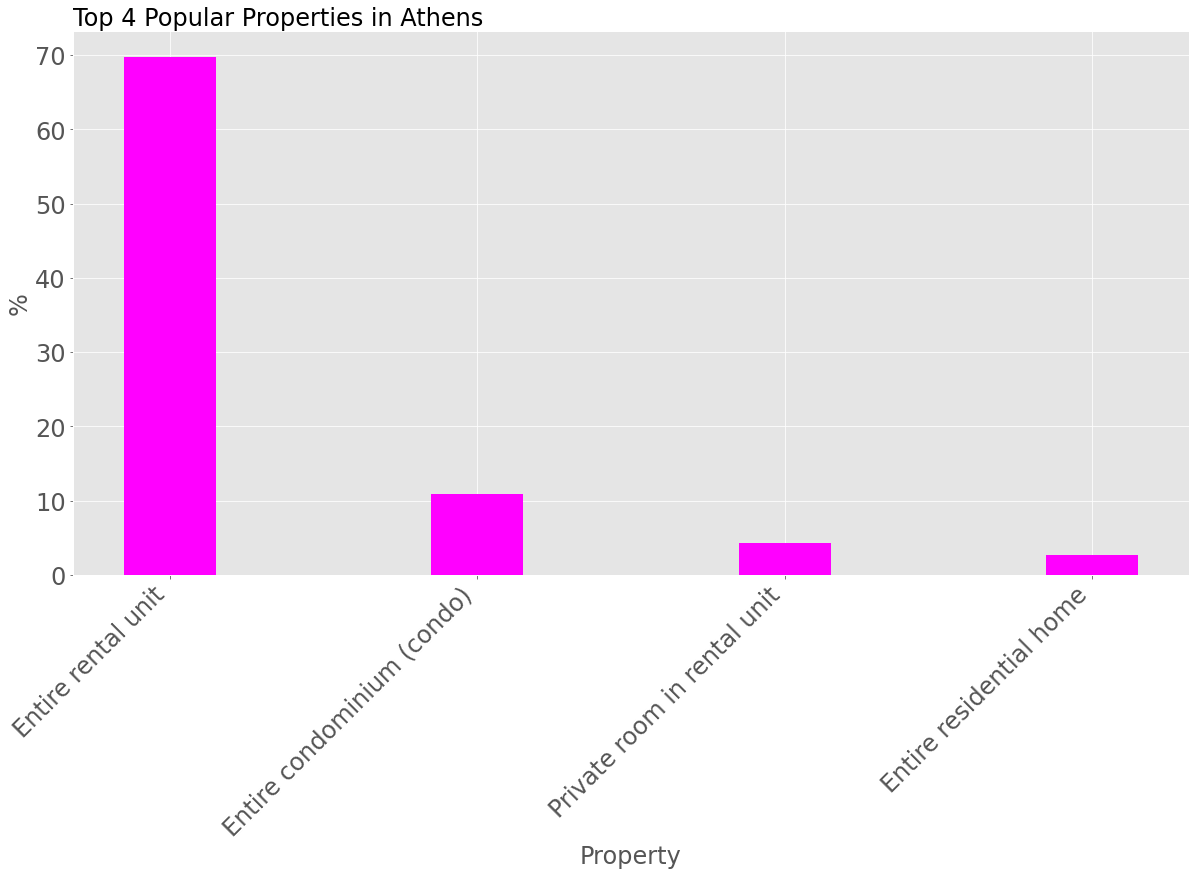

In [30]:
#percentages of property_type 
my=round(df["property_type"].value_counts()/df.shape[0]*100,2)[0:8]

#barplot of top 4 popular properties type
plt.bar(list(my.index)[0:4],my.values[0:4],width=0.3,color="fuchsia")
plt.ylabel("%",fontsize=24)
plt.xlabel("Property",fontsize=24)
plt.title("Top 4 Popular Properties in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

the entire rental unit absorbs about 70% of the distribution of property type which ranks it as the most prefered.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

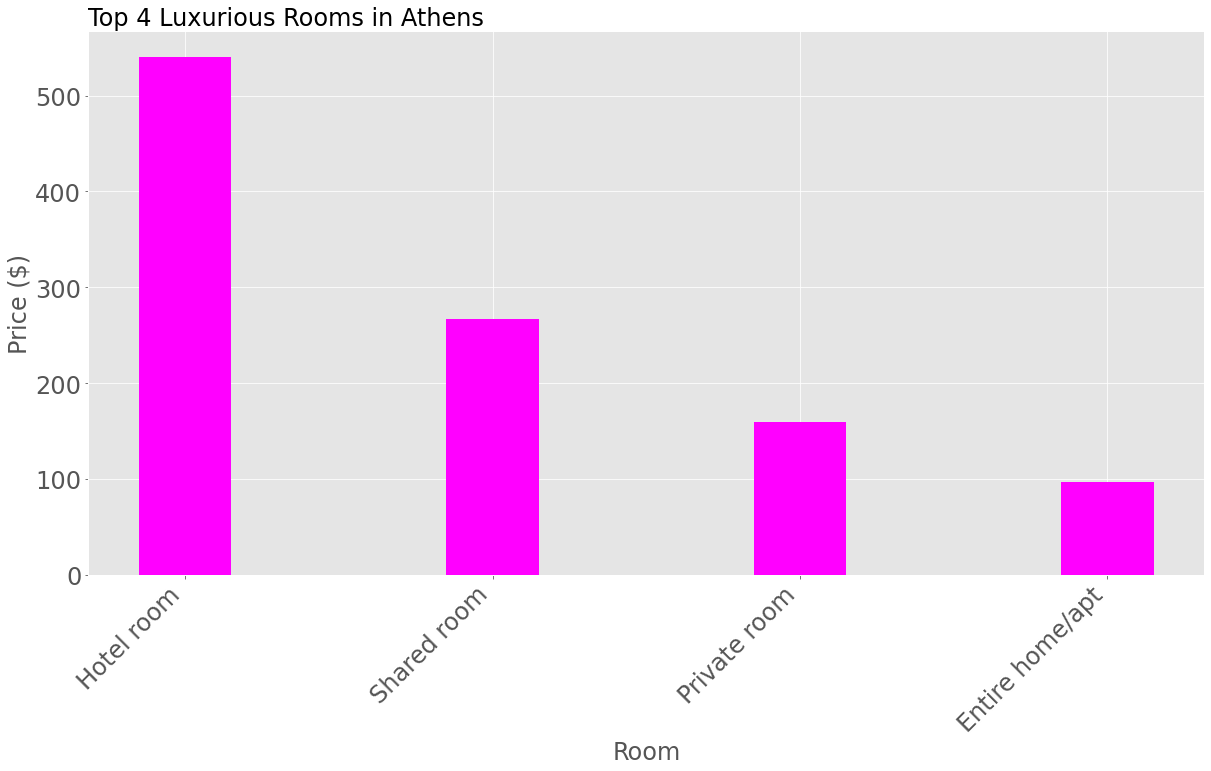

In [31]:
#set figure size
plt.rcParams["figure.figsize"] = (20,10)

#group by room_type and aggregate over average price by sorting descending
my=df.groupby(['room_type']).mean().sort_values('price', ascending=False)["price"]

#barplot of top 4 luxurious room types
plt.bar(list(my.index),my.values,width=0.3,color="fuchsia")
plt.ylabel("Price ($)",fontsize=24)
plt.xlabel("Room",fontsize=24)
plt.title("Top 4 Luxurious Rooms in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

we deduce that Hotel room to be the most expensive (550$) followed by shared room, private room and entire home/apt.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

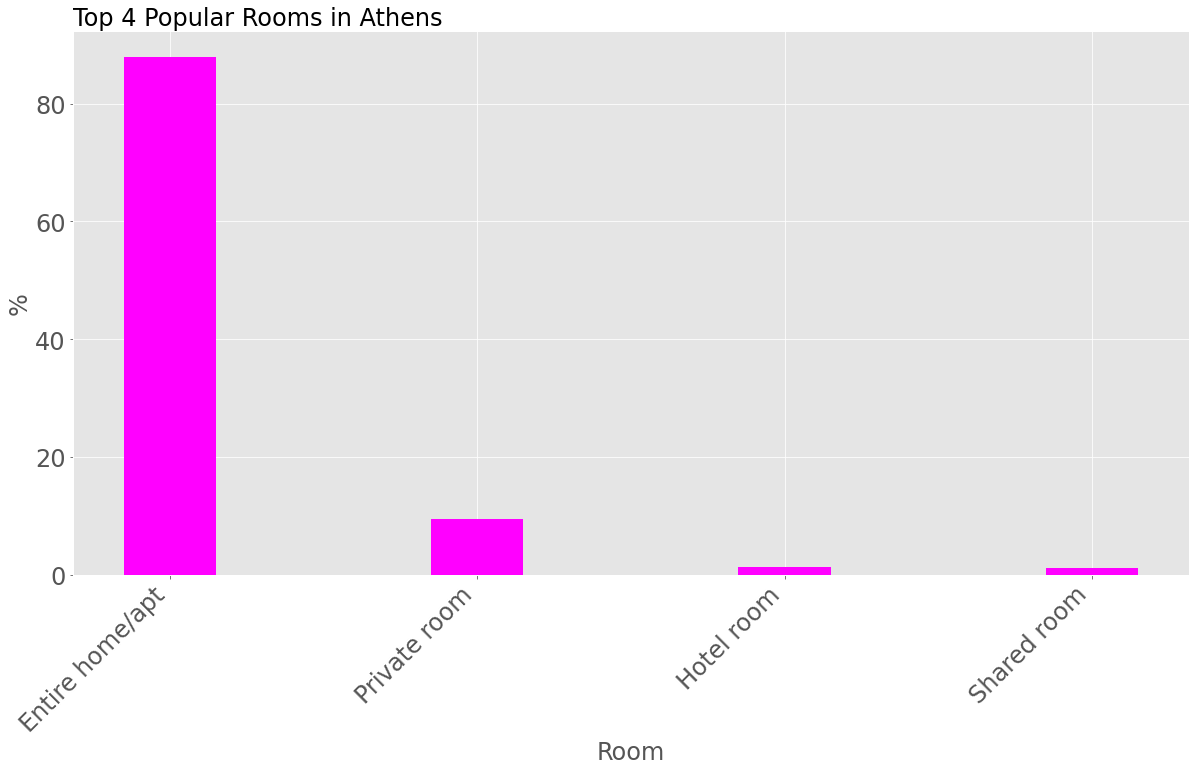

In [32]:
#percentages of room_type 
my=round(df["room_type"].value_counts()/df.shape[0]*100,2)

#barplot of top 4 popular room types
plt.bar(list(my.index),my.values,width=0.3,color="fuchsia")
plt.ylabel("%",fontsize=24)
plt.xlabel("Room",fontsize=24)
plt.title("Top 4 Popular Rooms in Athens",loc='left',fontsize=24)
plt.xticks(rotation=45, ha="right",fontsize=24)
plt.yticks(fontsize=24)

the entire home/apt marks about 85% of users' preference.

## General Comment about Question 2

These findings suggest that both property and room type have an impact on the reservation prices.

# Q3: Which are the most important factors of rental landscape activity that decide the reservation price?

For this question, I have used a Random Forest regression model to extract the relative importance of different features of the rental landscape that probably impact the reservation price.

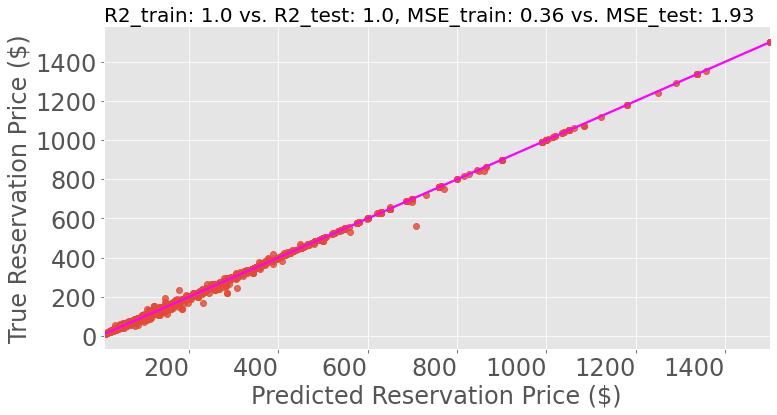

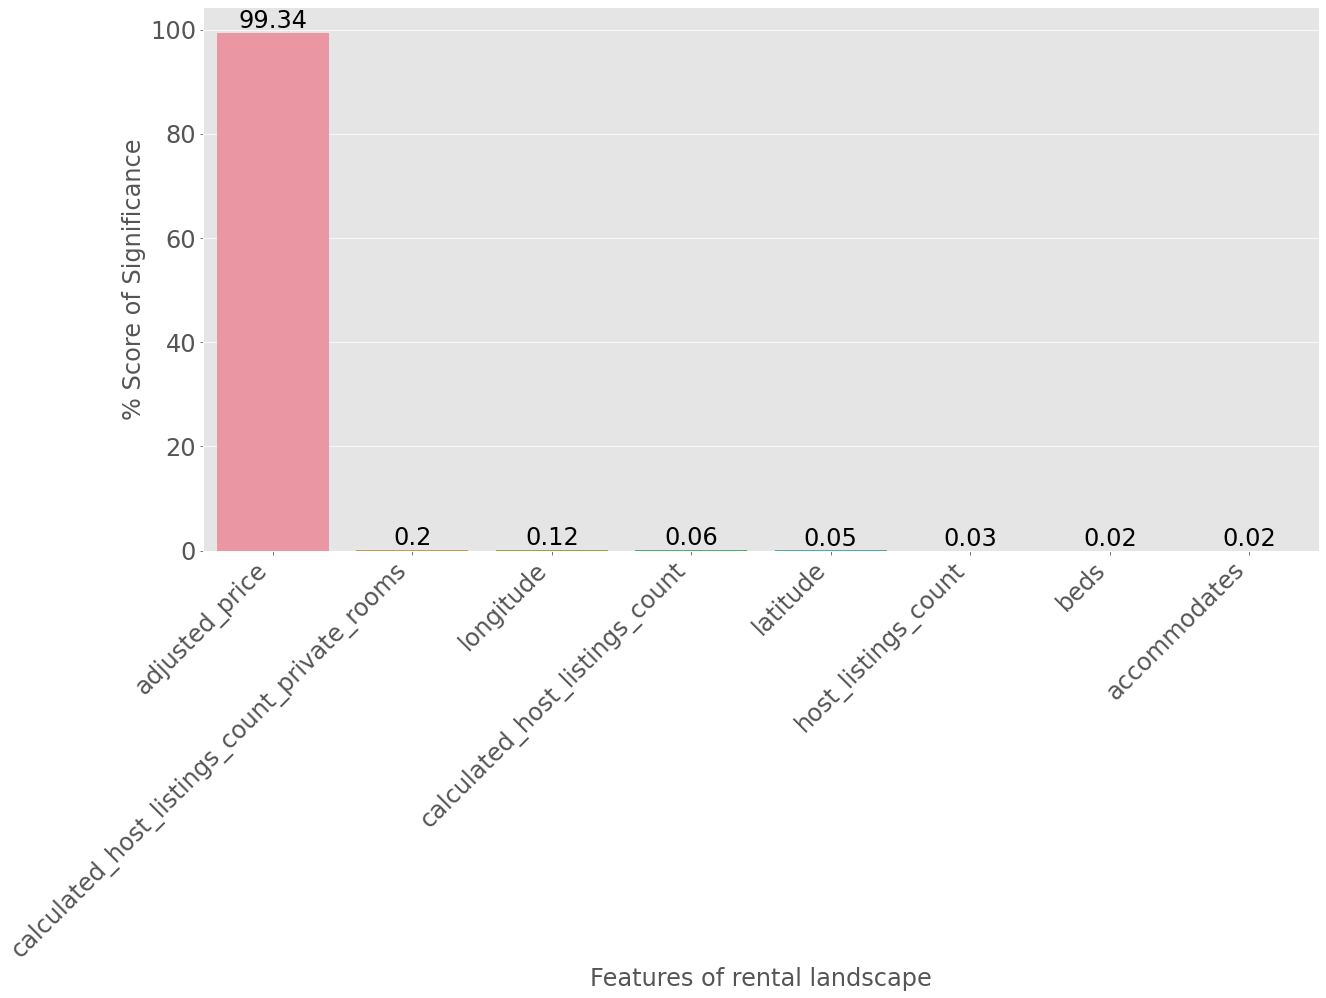

In [33]:
model=randomforest_model(df=df2,Test_Size=0.3,response='price')

From the above we can clearly infer that the adjusted_price drives at 99.34% the reservation price with respect to other features. In particular, calculated_host_listings_count_private_rooms and longitude are ranked respectively with 0.2% and 0.12%, whereas the rest are ranked significant with a lower bound than 0.1%. However, it is remarkable that number of beds and accomodates take only about 0.02% of significance as they tend to represent key features of reservation price. In order to conlude, we look shortly on the figure below and observe that the model predicts with a relative high accuracy after comparing the metrics of predictive assesment as the predicted and true reservation price are found on the main diagonal.